In [60]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering ,KMeans, DBSCAN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

# DATA : Airlines 

## Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

 * 1 = under 5,000

 * 2 = 5,000 - 10,000

 * 3 = 10,001 - 25,000

 * 4 = 25,001 - 50,000

 * 5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [2]:
df = pd.read_excel("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A7 Clustering\\EastWestAirlines.xlsx", sheet_name = "data",index_col=0)
df.index.rename('ID', inplace=True)
df.rename(columns={'Award?': 'Award'}, inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [4]:
for i in df.columns:
    print(i, '\n', df[i].value_counts(),'\n', '\n')

Balance 
 1000     10
500       5
2000      5
1500      4
5000      3
         ..
9554      1
30130     1
12665     1
9860      1
3016      1
Name: Balance, Length: 3904, dtype: int64 
 

Qual_miles 
 0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: Qual_miles, Length: 164, dtype: int64 
 

cc1_miles 
 1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64 
 

cc2_miles 
 1    3956
2      28
3      15
Name: cc2_miles, dtype: int64 
 

cc3_miles 
 1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64 
 

Bonus_miles 
 0        475
500       66
1000      42
100       27
1500      25
        ... 
11981      1
28904      1
9850       1
52449      1
25447      1
Name: Bonus_miles, Length: 2734, dtype: int64 
 

Bonus_trans 
 0     475
14    262
3     250
13    231
15    212
1     212
4     190
16    189
12    148
17    140
5     126
18    125

In [5]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Balance: [28143 19244 41354 ... 73597 54899  3016]
Qual_miles: [    0  2024   500   967  5031  1182  1776  1745   733  2398  1250  2706
  2998  2556  6727  1374  1952  2000  1178  7210  2015  2066  2128  2919
  1024   589  2880  3445   862  8264  1604  2975   588  1199  2586  3490
  5051  1115   810  4081  2376   948  6286  2253  2565  2643  8559  3818
  8753  9325  4301  1094  3692  1896  1000  1388  4116  2505 11148   888
 10098   745  5124  2408   867  1846  1514  8019   763  4924  1697  1739
  2370  6168   925  2288  1467  1704  2329  1099  1505  6920  2139  4481
  1448   250   783  2360  2364  2396  1362  5583  1440  5009   909  2395
  3867  1452  6057  2081  1112  2704  7663  3953  5513  2454   957  4704
  7558  2562  4727  5368  1754   651 10074  2900  1692  2600  1526  3508
   629  1651  1674  2433  1249  2543  2738  1619  6153  4361  2947  2194
   719  2611  1121  2576  4670  1761  6396  4844  2788  2178  3418  7487
  4903  1621  2092  1082  2305  3649   899  7257  4877  3071 

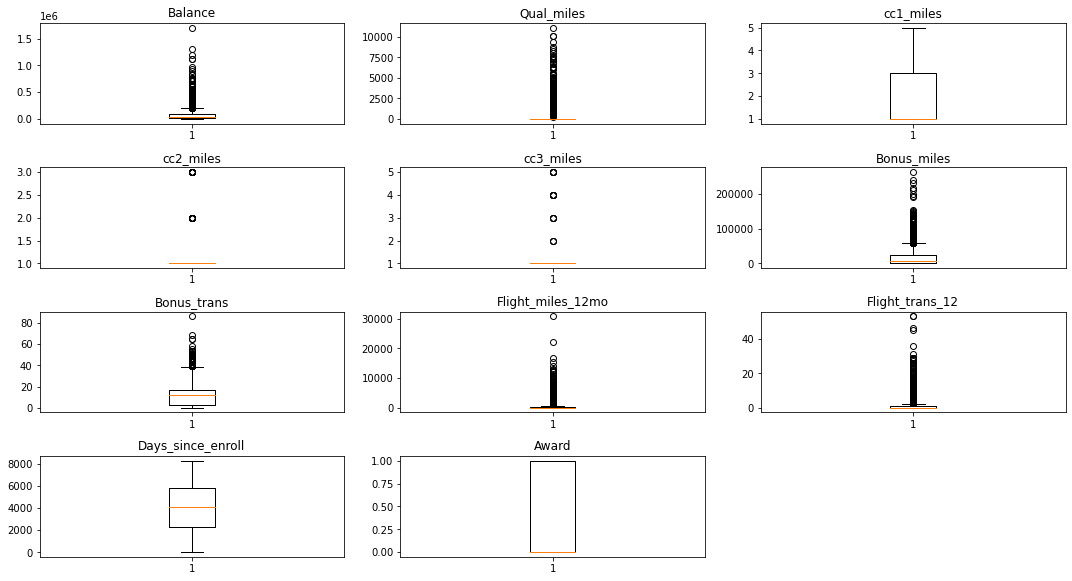

In [6]:
plt.figure(figsize=(15,30))
for i,j in enumerate(df.columns):
  plt.subplot(15,3,i+1)
  plt.boxplot(df[j])
  plt.title(j)
  plt.tight_layout()

In [7]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


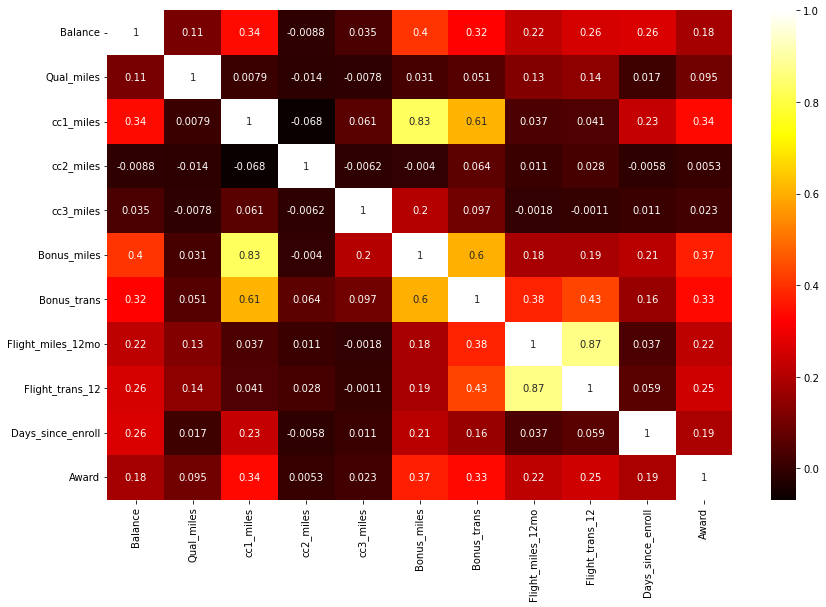

In [8]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='hot')
plt.show()

# Hierarchical Clustering with agglomerative Method :

>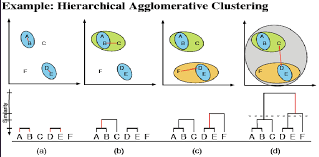

In [9]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [10]:
data = df.copy()

In [11]:
d = preprocessing.normalize(data)
data_norm = pd.DataFrame(d ,columns=data.columns)
data_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In [12]:
data_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.000000,3.999000e+03,3.999000e+03,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.896759,0.002967,6.018929e-05,4.657600e-05,4.622071e-05,0.236466,0.000275,0.007905,0.000025,0.136356,0.000010
std,0.172929,0.024981,9.422640e-05,9.549912e-05,9.533347e-05,0.244995,0.000379,0.028669,0.000115,0.172916,0.000025
min,0.000000,0.000000,5.865288e-07,5.865288e-07,5.865288e-07,0.000000,0.000000,0.000000,0.000000,0.001455,0.000000
25%,0.887264,0.000000,2.171282e-05,1.013626e-05,1.019430e-05,0.037068,0.000067,0.000000,0.000000,0.036485,0.000000
50%,0.967287,0.000000,3.893489e-05,2.106245e-05,2.106245e-05,0.153473,0.000162,0.000000,0.000000,0.071895,0.000000
75%,0.992306,0.000000,6.681146e-05,4.699541e-05,4.639664e-05,0.371607,0.000326,0.003320,0.000013,0.156184,0.000009
max,0.999995,0.707105,1.942986e-03,1.942986e-03,1.942986e-03,0.999039,0.005434,0.568473,0.005434,0.999854,0.000496


## Methods :

>  Method 1 : Single-linkage (The closest point in each cluster)

>  Method 2 : Centroid (The average of each cluster)

>  Method 3 : Complete-linkage (The furthest point in each cluster)

>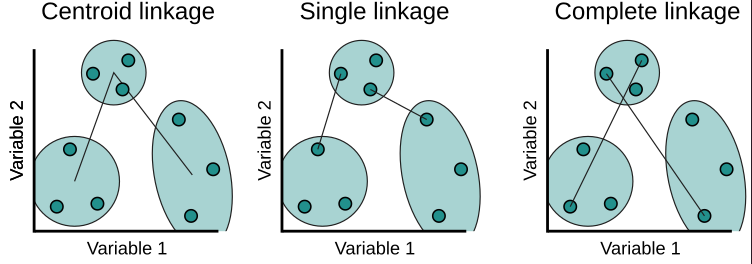

## Method 1 : Single-linkage (The closest point in each cluster)

> In single-link (or single linkage) hierarchical clustering, we merge in each step the two clusters whose two closest members have the smallest distance (or: the two clusters with the smallest minimum pairwise distance)

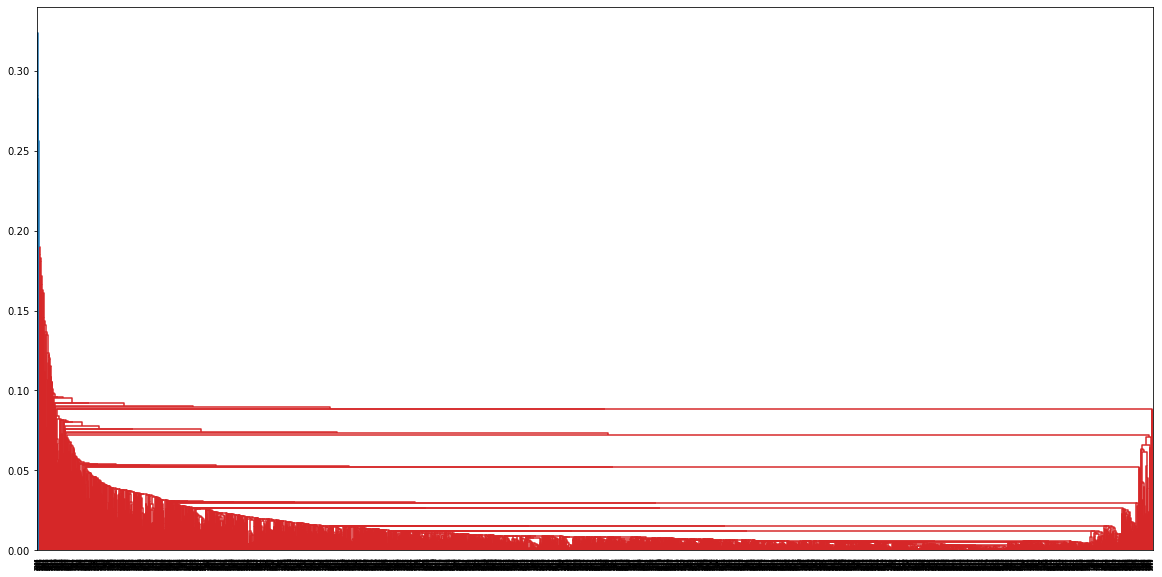

In [13]:
plt.figure(figsize=(20,10))
dendrogram1 = sch.dendrogram(sch.linkage(data_norm, method='single'))

## Method 2 : Centroid (The average of each cluster)

> In the centroid method, the distance between two clusters is defined as the Euclidean distance between their centroid or means. The distance between two cluster is the ANOVA sum of squares between the clusters added up over all the variables.

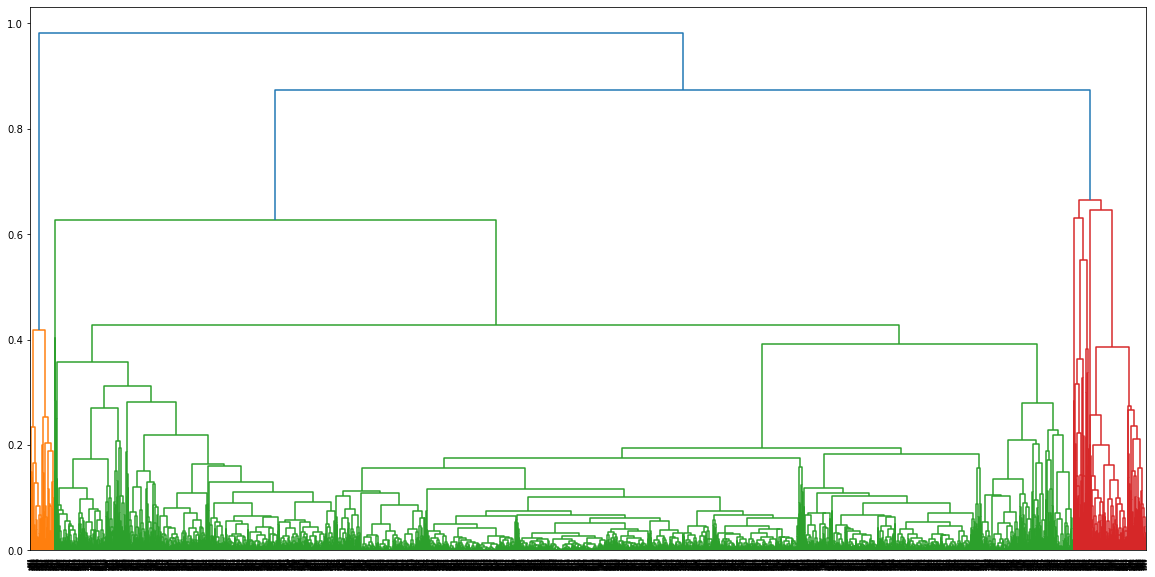

In [14]:
plt.figure(figsize=(20,10))
dendrogram2 = sch.dendrogram(sch.linkage(data_norm, method='average'))

>Seeing at the dendogram we can select number of clusters as 7.

In [15]:
#create cluster
hc2 = AgglomerativeClustering(n_clusters=7, affinity = "euclidean", linkage = "average")
hc2.fit(data_norm)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [16]:
#saving the clusters
y_hc2 = hc2.fit_predict(data_norm)
y_hc2

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [17]:
#adding the clusters to the dataframe
data['clusterID_hc'] = y_hc2
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterID_hc
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [18]:
#number of datapoints for each clusters
data["clusterID_hc"].value_counts()

2    3645
3     202
1      87
0      55
6       6
5       3
4       1
Name: clusterID_hc, dtype: int64

In [19]:
data["clusterID_hc"].var() 

0.158979464726119

In [20]:
df2_clustered1 = data.sort_values("clusterID_hc")
df2_clustered1.iloc[:,[-1]]

,clusterID_hc
ID,
398,0
3605,0
3821,0
202,0
2206,0
...,...
3724,6
1576,6
2159,6


## Method 3 : Complete-linkage (The furthest point in each cluster)

> The complete linkage method is a hierarchical classification method where the distance between two classes is defined as the greatest distance that could be obtained if we select one element from each class and measure the distance between these elements.

In [21]:
data2 = df.copy()

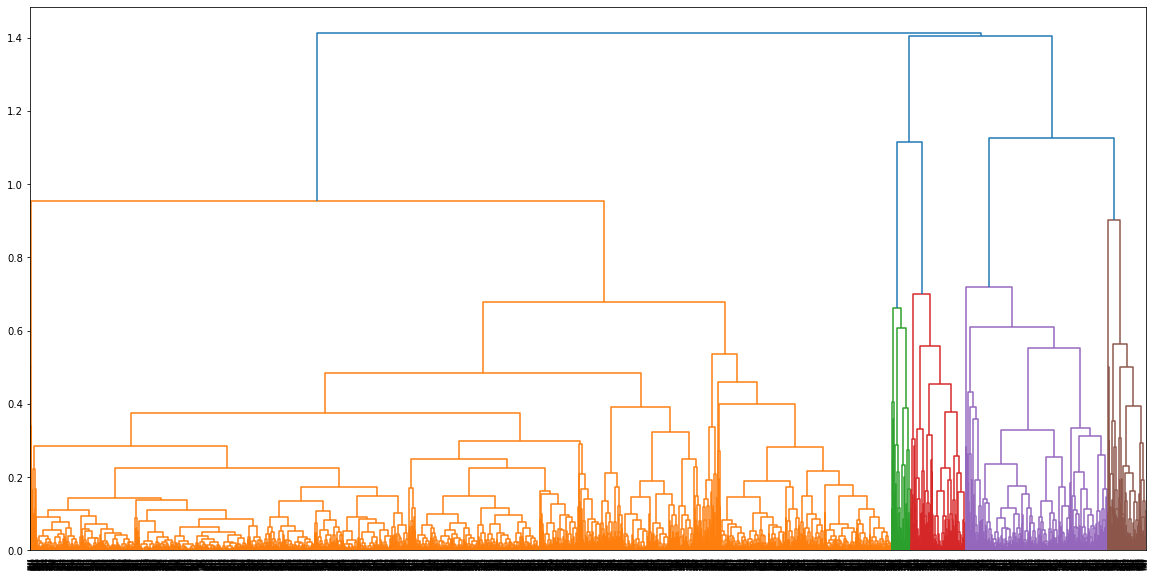

In [22]:
plt.figure(figsize=(20,10))
dendrogram3 = sch.dendrogram(sch.linkage(data_norm, method='complete'))

>Seeing at the dendogram we can select number of clusters as 6

In [23]:
#create cluster
hc3 = AgglomerativeClustering(n_clusters=6, affinity = "euclidean", linkage = "complete")
hc3.fit(data_norm)
hc3.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [24]:
#saving the clusters
y_hc3 = hc3.fit_predict(data_norm)
print(y_hc2)

[2 2 2 ... 2 2 2]


In [25]:
#adding the clusters to the dataframe
data2['clusterID_hc'] = y_hc3
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterID_hc
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
4018,64385,0,1,1,1,981,5,0,0,1395,1,2
4019,73597,0,3,1,1,25447,8,0,0,1402,1,2


In [26]:
data2['clusterID_hc'].var()

0.38574100753801804

> Variation is heigh as compare to Method 2 .

In [27]:
#number of datapoints for each clusters
data2["clusterID_hc"].value_counts()

2    3080
1     509
3     197
0     137
4      70
5       6
Name: clusterID_hc, dtype: int64

In [28]:
df_clustered1 = data2.sort_values("clusterID_hc").iloc[:,[-1]]
df_clustered1

,clusterID_hc
ID,
1748,0
614,0
2083,0
103,0
1429,0
...,...
3720,5
3724,5
3770,5


# K-Means Clustering :

>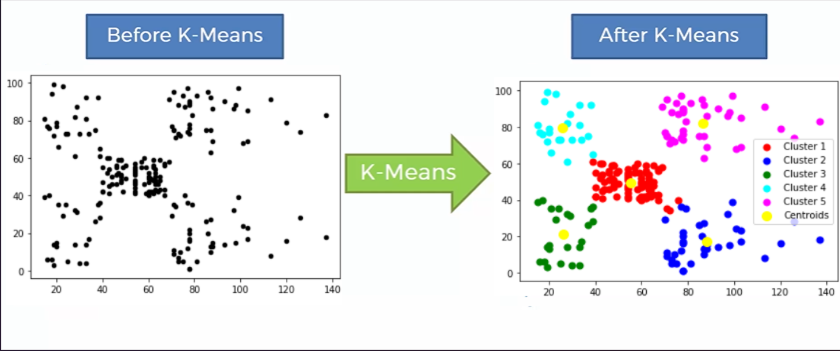

In [29]:
data_km = df.copy()
data_km

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [30]:
#Standardizing the data
scaler = StandardScaler()
scaled_data_km = scaler.fit_transform(data_km.iloc[:,1:])
scaled_data_km

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

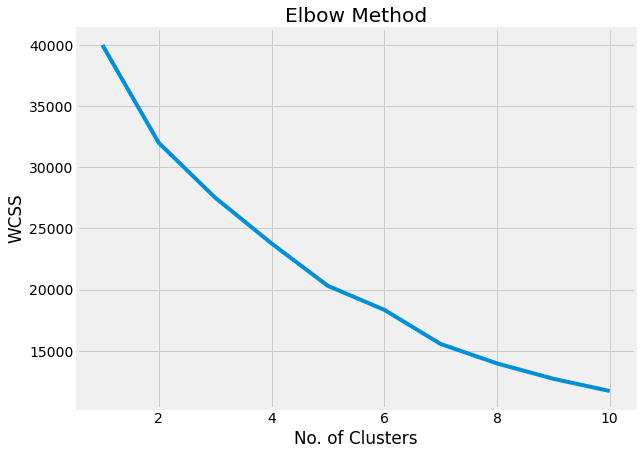

In [31]:
plt.figure(figsize=(10,7))
wcss2 = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters=i,random_state=0)
  kmeans2.fit(scaled_data_km)
  wcss2.append(kmeans2.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11),wcss2)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()

>Looking at the curve we may conclude that the number of clusters shall be taken as 7.

## Checking Elbow point :

In [32]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [33]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss2, curve="convex", direction="decreasing")
kl.elbow

5

In [34]:
#Build Cluster algorithm
clusters_new = KMeans(n_clusters=5,random_state=42)
clusters_new.fit(scaled_data_km)

KMeans(n_clusters=5, random_state=42)

In [35]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [38]:
#assign clusters to the dataset
data_km["clusterID_km"] = clusters_new.labels_
data_km.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterID_km
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [39]:
#number of datapoints for each clusters
data_km["clusterID_km"].value_counts()

2    2545
1    1233
0     163
4      43
3      15
Name: clusterID_km, dtype: int64

In [40]:
data_km["clusterID_km"].var()

0.38529917621977033

In [41]:
df_clustered2 = data_km.sort_values("clusterID_km")
df_clustered2.iloc[:,[-1]]

,clusterID_km
ID,
2075,0
380,0
671,0
631,0
2824,0
...,...
3811,4
230,4
3382,4


In [42]:
# ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)

# DBSCAN

>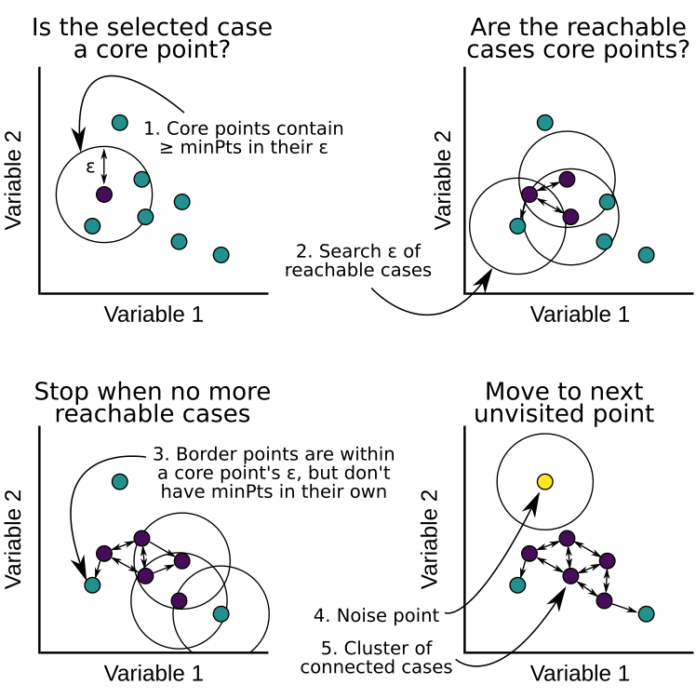

In [43]:
#creating a copy
data_db = df.copy()

In [44]:
#Standardizing the data
scaler = StandardScaler()
scaled_data_db = scaler.fit_transform(data_db.iloc[:,1:])
scaled_data_db

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

### Finding the Optimal value of Epsilon

>Rather than experimenting with different values of epsilon, we can use the elbow point detection method to arrive at a suitable value of epsilon.


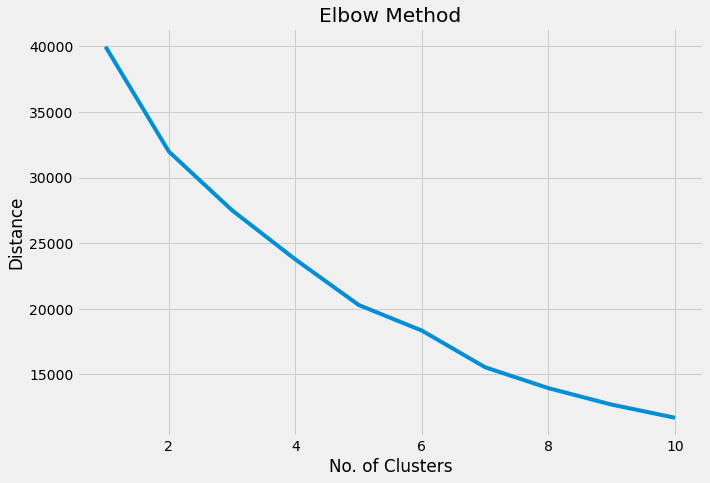

In [45]:
plt.figure(figsize=(10,7))
distance = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters=i,random_state=0)
  kmeans2.fit(scaled_data_db)
  distance.append(kmeans2.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11),wcss2)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Distance")
plt.show()

In [46]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss2, curve="convex", direction="decreasing")
kl.elbow

5

In [47]:
#creating clusters
dbscan = DBSCAN(eps=5, min_samples=11)
dbscan.fit(scaled_data_db)

DBSCAN(eps=5, min_samples=11)

In [48]:
#assigning the clusters to the datset
data_db["clusterID_db"] = dbscan.labels_
data_db.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterID_db
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [49]:
data_db["clusterID_db"].var()

0.037118459204597436

In [50]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

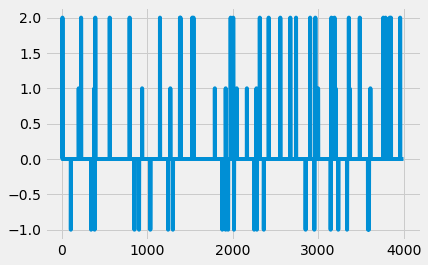

In [51]:
plt.plot(dbscan.labels_)

In [52]:
data_db["clusterID_db"].value_counts()

 0    3934
 2      28
-1      22
 1      15
Name: clusterID_db, dtype: int64

In [53]:
#creating dataframe for plot
counts = pd.DataFrame({"Cluster_No" : [-1,0,1,2], "clusterID_db" : [23,3934,15,23]})
counts

,Cluster_No,clusterID_db
0,-1,23
1,0,3934
2,1,15
3,2,23


<BarContainer object of 4 artists>

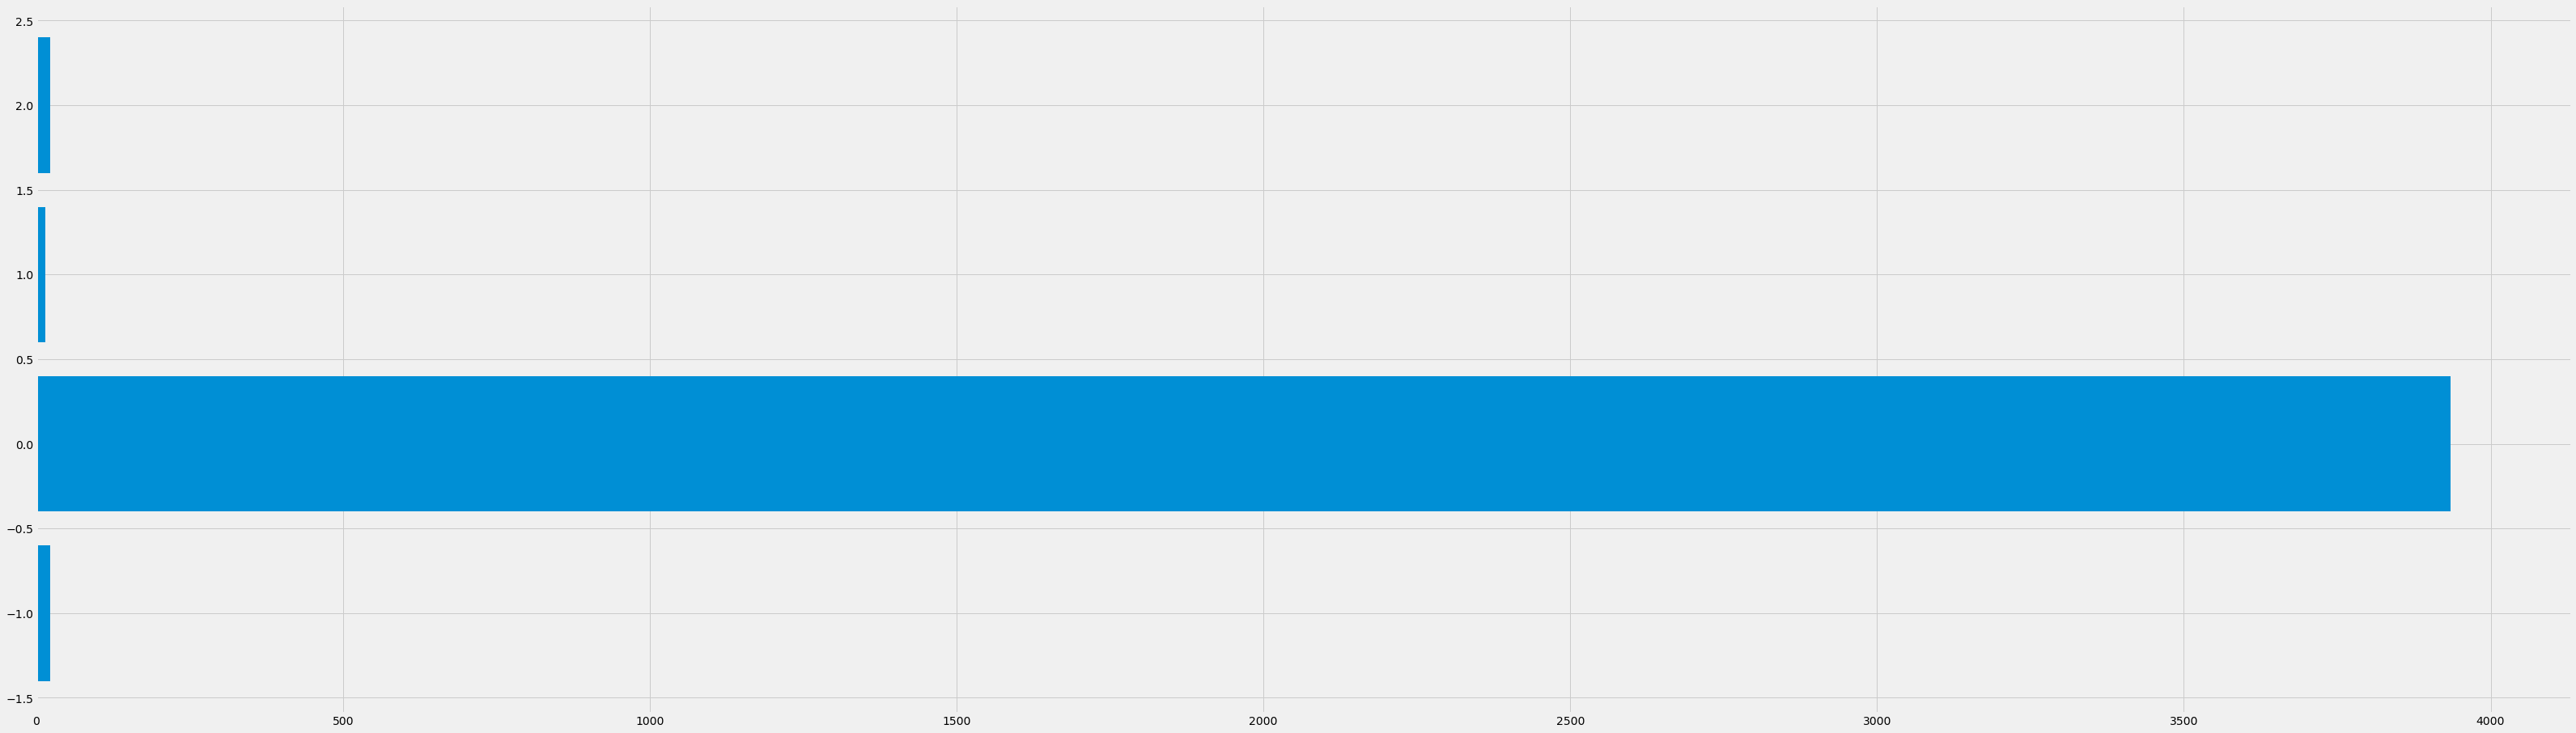

In [54]:
plt.figure(figsize=(50,15))
plt.barh(counts["Cluster_No"], counts["clusterID_db"])

In [55]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 3


In [56]:
# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 22


> The DBSCAN has created 3 clusters, and the cluster with -1 label represents the noisy datapoints.

In [57]:
df_clustered3 = data_db.sort_values("clusterID_db")
df_clustered3.iloc[:,[-1]]

,clusterID_db
ID,
1257,-1
1934,-1
1313,-1
348,-1
1963,-1
...,...
568,2
230,2
1542,2


In [58]:
#comparing the clusters from various methods
hc = data["clusterID_hc"]
kmeans = data_km["clusterID_km"]
dbscan = data_db["clusterID_db"]
final = pd.concat([hc, kmeans, dbscan], axis=1)
final

,clusterID_hc,clusterID_km,clusterID_db
ID,,,
1,2,2,0
2,2,2,0
3,2,2,0
4,2,2,0
5,2,1,0
...,...,...,...
4017,2,2,0
4018,2,2,0
4019,2,1,0


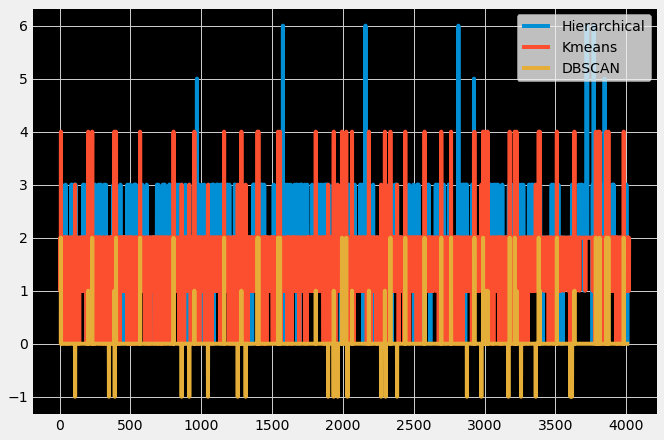

In [59]:
plt.figure(figsize=(10,7) )
plt.axes(facecolor='black')
plt.plot(data["clusterID_hc"],label = "Hierarchical")
plt.plot(data_km["clusterID_km"],label = "Kmeans")
plt.plot(data_db["clusterID_db"],label = "DBSCAN")
plt.legend(loc='upper right')
plt.show()